# **30 Day Map Challenge 2022**
## *Day 1: Points*
The goal for this first task is to replicate the map created for the same day in 2021 only thorugh Python coding with osmnx, geopandas and matplotlib libraries.

In [1]:
# import requested libraries
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar

In [2]:
# Selecting the city for the map
place_name = "Milano, Italy"

In [3]:
# Geocode the selected city and get its boundary
area = ox.geocode_to_gdf(place_name)

C:\Users\Admin\.conda\envs\python-gis\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


In [4]:
# Check the data type
area

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((9.04089 45.44745, 9.04093 45.44727, ...",45.535848,45.386738,9.27811,9.040887,296951013,relation,44915,45.464194,9.189635,"Milan, Lombardy, Italy",boundary,administrative,0.849065


In [5]:
# Defining the values of key-values for the OSM tag associated to traffic lights
tags = {'highway': 'traffic_signals'}   
# Getting data for the defined tag in the selected city
tl = ox.geometries_from_place(place_name, tags)
# Checking data
tl.head()

C:\Users\Admin\.conda\envs\python-gis\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


highway                  geometry junction  \
element_type osmid                                                          
node         13595397  traffic_signals  POINT (9.13066 45.49952)      NaN   
             13919640  traffic_signals  POINT (9.15375 45.48613)      NaN   
             13919747  traffic_signals  POINT (9.16079 45.48079)      NaN   
             21225803  traffic_signals  POINT (9.19091 45.46063)      NaN   
             21225818  traffic_signals  POINT (9.12798 45.46302)      NaN   

                      traffic_signals:direction created_by traffic_signals  \
element_type osmid                                                           
node         13595397                       NaN        NaN             NaN   
             13919640                       NaN        NaN             NaN   
             13919747                       NaN        NaN             NaN   
             21225803                       NaN        NaN             NaN   
             21225818                       NaN        NaN             NaN   

                      crossing survey:date bicycle fixme  ... image  \
element_type osmid                                        ...         
node         13595397      NaN         NaN     NaN   NaN  ...   NaN   
             13919640      NaN         NaN     NaN   NaN  ...   NaN   
             13919747      NaN         NaN     NaN   NaN  ...   NaN   
             21225803      NaN         NaN     NaN   NaN  ...   NaN   
             21225818      NaN         NaN     NaN   NaN  ...   NaN   

                      crossing:island comment:it source button_operated  \
element_type osmid                                                        
node         13595397             NaN        NaN    NaN             NaN   
             13919640             NaN        NaN    NaN             NaN   
             13919747             NaN        NaN    NaN             NaN   
             21225803             NaN        NaN    NaN             NaN   
             21225818             NaN        NaN    NaN             NaN   

                      start_date foot obstacle:wheelchair support width  
element_type osmid                                                       
node         13595397        NaN  NaN                 NaN     NaN   NaN  
             13919640        NaN  NaN                 NaN     NaN   NaN  
             13919747        NaN  NaN                 NaN     NaN   NaN  
             21225803        NaN  NaN                 NaN     NaN   NaN  
             21225818        NaN  NaN                 NaN     NaN   NaN  

[5 rows x 30 columns]

C:\Users\Admin\.conda\envs\python-gis\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Users\Admin\.conda\envs\python-gis\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<AxesSubplot:>

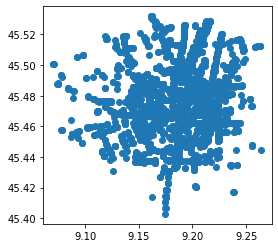

In [6]:
# Plotting data
tl.plot()

C:\Users\Admin\.conda\envs\python-gis\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Users\Admin\.conda\envs\python-gis\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<AxesSubplot:>

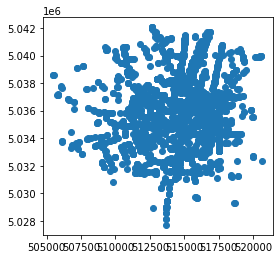

In [7]:
# Reprojecting data in the Italian CRS
tl = tl.to_crs(32632)
tl.plot()

In [8]:
# Getting max and min coord values for the data
minx, miny, maxx, maxy = tl.geometry.total_bounds

In [9]:
# Setting plot options
fig, ax = plt.subplots(figsize=(15, 15), facecolor='black')
ax = plt.gca()
_ = ax.axis('off')
tl.plot(color='white', edgecolor='none', ax=ax)
ax.add_artist(ScaleBar(1, box_color='black',color='white', font_properties={'family':'Special Elite', 'size': 'large'}, location='lower right'))
ax.annotate('30 Day Map Challenge - Day 1: Points\nFederica Gaspari (@fede_gaspari)\nData: OpenStreetMap contributors\nTools: Python',font_properties={'family':'Special Elite', 'size': 'large'}, xy=(minx,miny), color='white')
plt.title('Big City Lights in '+ str(place_name),  fontname="Special Elite", color="white", fontsize="25")
#Defining filename and save image
filename = "images/Day012022_Points.jpg"
fig.savefig(filename)
plt.close(fig)

C:\Users\Admin\.conda\envs\python-gis\lib\site-packages\geopandas\plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
C:\Users\Admin\.conda\envs\python-gis\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
